In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-cover-type-dataset/covtype.csv


# Обрабатываем входные данные

In [20]:
df = pd.read_csv('/kaggle/input/forest-cover-type-dataset/covtype.csv')

In [21]:
df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...    Soil_Type32  \
count  581012.000000                       581012.000000  ...  581012.000000   
mean      142.528263                         1980.291226  ...       0.090392   
std        38.274529                         1324.195210  ...       0.286743   
min         0.000000                            0.000000  ...       0.000000   
25%       119.000000                         1024.000000  ...       0.000000   
50%       143.000000                         1710.000000  ...       0.000000   
75%       168.000000                         2550.000000  ...       0.000000   
max       254.000000                         7173.000000  ...       1.000000   

         Soil_Type33    Soil_Type34    Soil_Type35    Soil_Type36  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.077716       0.002773       0.003255       0.000205   
std         0.267725       0.052584       0.056957       0.014310   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type37    Soil_Type38    Soil_Type39    Soil_Type40  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.000513       0.026803       0.023762       0.015060   
std         0.022641       0.161508       0.152307       0.121791   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Cover_Type  
count  581012.000000  
mean        2.051471  
std         1.396504  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         2.000000  
max         7.000000  

[8 rows x 55 colu

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [23]:
df.head(10)


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   
7       2605      49      4                               234   
8       2617      45      9                               240   
9       2612      59     10                               247   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   
5                             -15                               67   
6                               5                              633   
7                               7                              573   
8                              56                              666   
9                              11                              636   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   
5            230             237            140   
6            222             225            138   
7            222             230            144   
8            223             221            133   
9            228             219            124   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   
5                                6031  ...            0            0   
6                                6256  ...            0            0   
7                                6228  ...            0            0   
8                                6244  ...            0            0   
9                                6230  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   
6            0            0            0            0            0   
7            0            0            0            0            0   
8            0            0            0            0            0   
9            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  
5            0            0           2  
6            0            0           5  
7            0            0           5  
8           

# **Кореляцию параметров между собой и значением**

In [24]:
corr = df.corr()
corr

Elevation    Aspect     Slope  \
Elevation                            1.000000  0.015735 -0.242697   
Aspect                               0.015735  1.000000  0.078728   
Slope                               -0.242697  0.078728  1.000000   
Horizontal_Distance_To_Hydrology     0.306229  0.017376 -0.010607   
Vertical_Distance_To_Hydrology       0.093306  0.070305  0.274976   
Horizontal_Distance_To_Roadways      0.365559  0.025121 -0.215914   
Hillshade_9am                        0.112179 -0.579273 -0.327199   
Hillshade_Noon                       0.205887  0.336103 -0.526911   
Hillshade_3pm                        0.059148  0.646944 -0.175854   
Horizontal_Distance_To_Fire_Points   0.148022 -0.109172 -0.185662   
Wilderness_Area1                     0.131838 -0.140123 -0.234576   
Wilderness_Area2                     0.238164  0.055988 -0.036253   
Wilderness_Area3                     0.066550  0.074904  0.125663   
Wilderness_Area4                    -0.619374  0.082687  0.255503   
Soil_Type1                          -0.204512 -0.007574  0.107847   
Soil_Type2                          -0.187677 -0.005649 -0.018553   
Soil_Type3                          -0.182463 -0.002730  0.125497   
Soil_Type4                          -0.183521  0.017212  0.131847   
Soil_Type5                          -0.150376  0.008938  0.072311   
Soil_Type6                          -0.214606  0.010766  0.003673   
Soil_Type7                          -0.002252 -0.005052 -0.015661   
Soil_Type8                          -0.003021 -0.003366 -0.023359   
Soil_Type9                          -0.060915 -0.020800 -0.032752   
Soil_Type10                         -0.428746  0.049835  0.244037   
Soil_Type11                         -0.134227 -0.064344 -0.050894   
Soil_Type12                         -0.118905 -0.070209 -0.169300   
Soil_Type13                         -0.043984  0.054544  0.192423   
Soil_Type14                         -0.080825  0.007597  0.000228   
Soil_Type15                         -0.007153 -0.002660  0.001081   
Soil_Type16                         -0.059446  0.007846 -0.034791   
Soil_Type17                         -0.111028 -0.000168 -0.040208   
Soil_Type18                         -0.081811 -0.028353 -0.045851   
Soil_Type19                          0.033144 -0.003635 -0.083743   
Soil_Type20                         -0.043128 -0.029440 -0.077582   
Soil_Type21                          0.017557  0.032998 -0.025461   
Soil_Type22                          0.158959  0.021578 -0.053396   
Soil_Type23                          0.124356  0.013676 -0.207397   
Soil_Type24                          0.053582  0.018164  0.082434   
Soil_Type25                          0.028753 -0.003265  0.026364   
Soil_Type26                         -0.016657 -0.010661 -0.021449   
Soil_Type27                          0.035254  0.011328  0.043695   
Soil_Type28                         -0.029270  0.027535  0.067052   
Soil_Type29                          0.074327 -0.062181 -0.082941   
Soil_Type30                         -0.026667 -0.028922  0.075864   
Soil_Type31                          0.070405  0.001763 -0.034610   
Soil_Type32                          0.167077  0.056233 -0.133504   
Soil_Type33                          0.070633  0.019163  0.208942   
Soil_Type34                          0.011731  0.010861 -0.011002   
Soil_Type35                          0.083005 -0.021991 -0.022228   
Soil_Type36                          0.021107  0.002281  0.002918   
Soil_Type37                          0.035433 -0.020398  0.007848   
Soil_Type38                          0.217179  0.017706 -0.072208   
Soil_Type39                          0.193595  0.008294  0.093602   
Soil_Type40                          0.212612 -0.005866  0.025637   
Cover_Type                          -0.269554  0.017080  0.148285   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.306229   
Aspect                     

In [25]:
mask = np.zeros_like(corr)
triangle_idx = np.triu_indices_from(mask)
mask[triangle_idx] = True
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [26]:
plt.figure(figsize=(120,100))
sns.heatmap(corr,
            mask=mask,
            annot=True,
            annot_kws={"size":16})
sns.set_style("white")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

In [27]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

Видно, что датасет не сбалансирован

In [28]:
df['Cover_Type'] = df['Cover_Type'] - 1 # индексируем классы начиная с "0"

In [29]:
min_class_size = np.min(df['Cover_Type'].value_counts().values)

print(f"Size of smallest class: {min_class_size}")

Size of smallest class: 2747


In [30]:
nb_classes = set(df['Cover_Type']).__len__()
print(f"Number of classes: {nb_classes}")

Number of classes: 7


Т.к датасет не сбалансирован. Произведём балансировку датасеты по классу с наименьшем кол-вом строк в датасете


In [31]:
def balace_df_by_min_count_of_samples(df_copy):
    
    min_class_size = np.min(df_copy['Cover_Type'].value_counts().values)
    
    common_nb_classes = set(df_copy['Cover_Type']).__len__()
    
    class_subsets = [df_copy.query("Cover_Type == " + str(i)) for i in range(common_nb_classes)]

    for i in range(common_nb_classes):
        class_subsets[i] = class_subsets[i].sample(min_class_size, replace=False, random_state=123)

    return pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [32]:
balanced_df = balace_df_by_min_count_of_samples(df.copy())

In [33]:
balanced_df

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           3426       5     13                               319   
1           3032     138     12                               124   
2           2165     204     32                               295   
3           2834      80     16                               513   
4           2972     293      4                                30   
...          ...     ...    ...                               ...   
19224       2801     110      9                                42   
19225       2508     116     28                               351   
19226       1998     325     32                               335   
19227       3370     315      3                                 0   
19228       2687     298     32                               201   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  78                             3844   
1                                  17                             1637   
2                                 146                              603   
3                                 169                              532   
4                                   5                             1539   
...                               ...                              ...   
19224                               4                              713   
19225                             100                              330   
19226                             143                              306   
19227                               0                             4337   
19228                             107                             1357   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                202             213            147   
1                238             236            127   
2                186             249            177   
3                240             210             95   
4                209             239            168   
...              ...             ...            ...   
19224            236             230            126   
19225            254             200             53   
19226            125             187            193   
19227            212             237            163   
19228            115             209            226   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                    3290  ...            1            0   
1                                    1080  ...            0            0   
2                                     295  ...            0            0   
3                                    2322  ...            0            0   
4                                    1630  ...            0            0   
...                                   ...  ...          ...          ...   
19224                                 108  ...            0            0   
19225                                1209  ...            0            0   
19226                                 969  ...            0            0   
19227                                4160  ...            0            0   
19228                                 953  ...            0            1   

       Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
19224            0            0            0            0            0   
19225            0            0            0            0            0   
19226            0            0            0     

In [34]:
def split_and_scale_dataframe(df):
    # Разбиваем датасет на аргументы и результаты функции для будущей модели
    y = df['Cover_Type'].copy()
    X = df.drop('Cover_Type', axis=1).copy()
    
    # 70% на обучающую выборку и 30% для проверки качества обученной модели
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [35]:
# функция для оценки качества обученной модели

def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print(f"Accuracy `{class_balance}`: {model_acc * 100:.2f}%")
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n", clr)

# Формируем обучающую и тестовую выборку

In [36]:
x_train, x_test, y_train, y_test = split_and_scale_dataframe(balanced_df)

# Обучаем модель

In [37]:
model = LogisticRegression()
model.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Видим, что модель не сошлась к оптимальному решению. Явно зададим максимальное кол-во итераций**

In [38]:
model_LR = LogisticRegression(max_iter=500)
model_LR.fit(x_train, y_train)

LogisticRegression(max_iter=500)

**Оценим качество модели**

Accuracy `LogisticRegression(balanced dataset)`: 70.86%


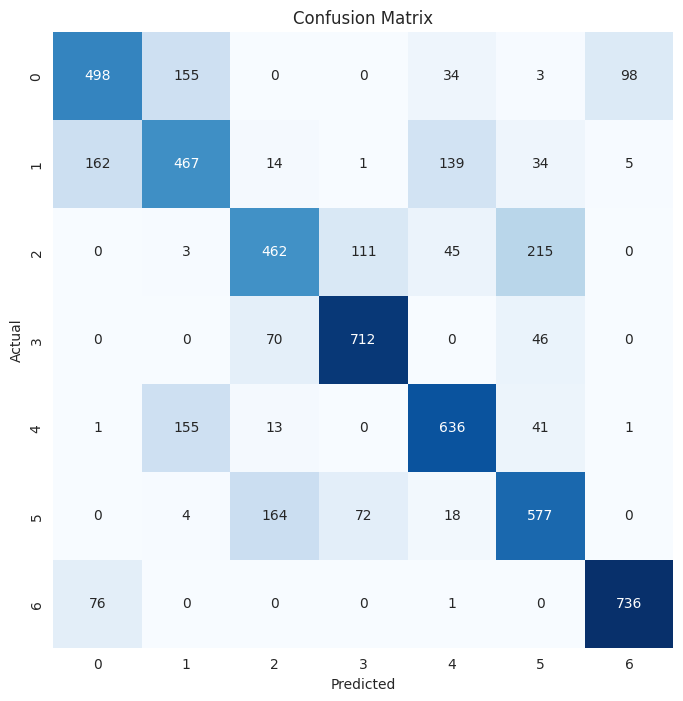

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       788
           1       0.60      0.57      0.58       822
           2       0.64      0.55      0.59       836
           3       0.79      0.86      0.83       828
           4       0.73      0.75      0.74       847
           5       0.63      0.69      0.66       835
           6       0.88      0.91      0.89       813

    accuracy                           0.71      5769
   macro avg       0.71      0.71      0.71      5769
weighted avg       0.71      0.71      0.71      5769



In [39]:
evaluate_model(model_LR, "LogisticRegression(balanced dataset)", x_test, y_test)

# Обучение модели на алгоритме RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model_RFC = RandomForestClassifier()
model_RFC.fit(x_train, y_train)

RandomForestClassifier()

Accuracy `RandomForestClassifier(balanced dataset)`: 86.76%


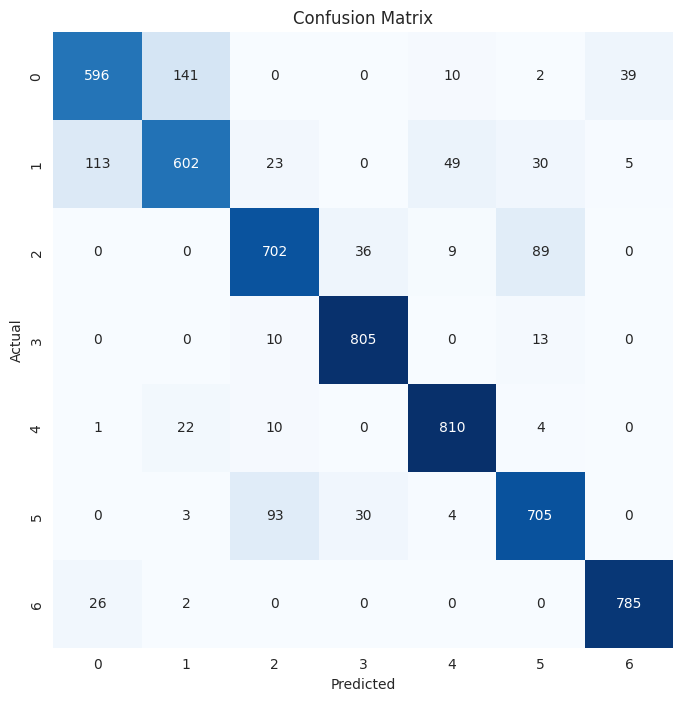

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       788
           1       0.78      0.73      0.76       822
           2       0.84      0.84      0.84       836
           3       0.92      0.97      0.95       828
           4       0.92      0.96      0.94       847
           5       0.84      0.84      0.84       835
           6       0.95      0.97      0.96       813

    accuracy                           0.87      5769
   macro avg       0.87      0.87      0.87      5769
weighted avg       0.87      0.87      0.87      5769



In [42]:
evaluate_model(model_RFC, "RandomForestClassifier(balanced dataset)", x_test, y_test)

# Обучим модель на несбалансированном датасете и сравнив метрики

In [ ]:
x_train, x_test, y_train, y_test = split_and_scale_dataframe(df)

model_LR = LogisticRegression(max_iter=4_000)
model_LR.fit(x_train, y_train)

evaluate_model(model_LR, "LogisticRegression(unbalanced dataset)", x_test, y_test)

Как видно по матрице произошло переобучение 